In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import radians, sin, cos, asin, sqrt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### Data Imports

In [59]:
clean_train = pd.read_csv(r'./datasets/clean_train.csv')
clean_test = pd.read_csv(r'./datasets/clean_test.csv')

In [88]:
test = pd.read_csv(r'./datasets/test.csv')

In [61]:
clean_train.head()

,Unnamed: 0,Date,Address,Station,NumMosquitos,WnvPresent,CULEX ERRATICUS,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,...,Tmax,Tmin,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1,1,0,0,1,1,0,...,88,60,74.0,58,65,0.0,29.39,5.8,18,6.5
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",1,1,0,0,0,1,0,...,88,60,74.0,58,65,0.0,29.39,5.8,18,6.5
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",1,1,0,0,0,1,0,...,88,60,74.0,58,65,0.0,29.39,5.8,18,6.5
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",1,1,0,0,1,1,0,...,88,60,74.0,58,65,0.0,29.39,5.8,18,6.5
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",1,4,0,0,0,1,0,...,88,60,74.0,58,65,0.0,29.39,5.8,18,6.5


In [62]:
clean_test.head()

,Unnamed: 0,Id,Date,Address,Block,Street,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Tmax,Tmin,Tavg,DewPoint,WetBulb,PrecipTotal,StnPressure,ResultSpeed,ResultDir,AvgSpeed
0,0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
clean_train.drop('Unnamed: 0',axis = 1, inplace = True)
clean_test.drop('Unnamed: 0',axis = 1, inplace = True)

In [66]:
clean_train.shape

(8475, 163)

In [67]:
clean_train.isnull().sum().sum()

0

### Model Selection

In [68]:
features = [x for x in clean_train.columns if (x != 'NumMosquitos') and (x != 'WnvPresent') and (x!='Date') and (x != 'Address')]
features

['Station',
 'CULEX ERRATICUS',
 'CULEX PIPIENS',
 'CULEX RESTUANS',
 'CULEX SALINARIUS',
 'CULEX TARSALIS',
 'CULEX TERRITANS',
 'Bias',
 'year',
 'month',
 'day',
 'week',
 'Trap_T001',
 'Trap_T002',
 'Trap_T003',
 'Trap_T004',
 'Trap_T005',
 'Trap_T006',
 'Trap_T007',
 'Trap_T008',
 'Trap_T009',
 'Trap_T011',
 'Trap_T012',
 'Trap_T013',
 'Trap_T014',
 'Trap_T015',
 'Trap_T016',
 'Trap_T017',
 'Trap_T018',
 'Trap_T019',
 'Trap_T025',
 'Trap_T027',
 'Trap_T028',
 'Trap_T030',
 'Trap_T031',
 'Trap_T033',
 'Trap_T034',
 'Trap_T035',
 'Trap_T036',
 'Trap_T037',
 'Trap_T039',
 'Trap_T040',
 'Trap_T043',
 'Trap_T044',
 'Trap_T045',
 'Trap_T046',
 'Trap_T047',
 'Trap_T048',
 'Trap_T049',
 'Trap_T050',
 'Trap_T051',
 'Trap_T054',
 'Trap_T054C',
 'Trap_T060',
 'Trap_T061',
 'Trap_T062',
 'Trap_T063',
 'Trap_T065',
 'Trap_T066',
 'Trap_T067',
 'Trap_T069',
 'Trap_T070',
 'Trap_T071',
 'Trap_T072',
 'Trap_T073',
 'Trap_T074',
 'Trap_T075',
 'Trap_T076',
 'Trap_T077',
 'Trap_T078',
 'Trap_T079',

In [69]:
clean_test[:] = np.nan_to_num(clean_test)

In [70]:
clean_test.fillna(0, inplace=True)

In [71]:
col_mask=clean_test.isnull().any(axis=0) 
row_mask=clean_test.isnull().any(axis=1)
clean_test.loc[row_mask,col_mask]

""


In [72]:
X = clean_train[features]
X_kaggle = clean_test[features]
y = clean_train['WnvPresent']
X.dtypes

Station               int64
CULEX ERRATICUS       int64
CULEX PIPIENS         int64
CULEX RESTUANS        int64
CULEX SALINARIUS      int64
CULEX TARSALIS        int64
CULEX TERRITANS       int64
Bias                float64
year                  int64
month                 int64
day                   int64
week                  int64
Trap_T001             int64
Trap_T002             int64
Trap_T003             int64
Trap_T004             int64
Trap_T005             int64
Trap_T006             int64
Trap_T007             int64
Trap_T008             int64
Trap_T009             int64
Trap_T011             int64
Trap_T012             int64
Trap_T013             int64
Trap_T014             int64
Trap_T015             int64
Trap_T016             int64
Trap_T017             int64
Trap_T018             int64
Trap_T019             int64
                     ...   
Trap_T221             int64
Trap_T222             int64
Trap_T223             int64
Trap_T224             int64
Trap_T225           

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state =42)


In [74]:
from sklearn.utils import resample
#rejoin train data on index so it can be downsampled to match classes
traindata = X_train.merge(pd.DataFrame(y_train), how = 'left', right_index = True, left_index = True)

#separate minority and majority classes
train_majority = traindata[traindata['WnvPresent'] == 0]
train_minority = traindata[traindata['WnvPresent'] == 1]

#upsample minority class
train_minority_upsampled = resample(train_minority, 
                                     replace = True, 
                                     n_samples = train_majority.shape[0],
                                     random_state = 42)
#combine classes
train_data_upsampled = pd.concat([train_majority, train_minority_upsampled])
#split back into X_train and y_train
X_train = train_data_upsampled.drop(columns = 'WnvPresent')
y_train = train_data_upsampled['WnvPresent']

In [75]:
def CART_model_picker(model_list, X_train, y_train, X_test, y_test):
    '''Returns cross-val score and score for all input CART models, returns in sorted order of best performing'''
    results = []
    
    for (k,v) in model_list.items():
        scores = cross_val_score(v, X_train, y_train, cv = 5, n_jobs = -1)
        v.fit(X_train, y_train)
        
        #calculate AUC
        fpr, tpr, _ = roc_curve(y_test, v.predict(X_test))
        roc_auc = auc(fpr, tpr)

        results.append((k, scores.mean(), v.score(X_test, y_test), roc_auc))
    
    results.sort(key = lambda x: x[3], reverse = True)
    
    return results

In [76]:
#setting up stratified kfold
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [77]:
#figure out which CART model performs the best

models = {'Decision Tree': DecisionTreeClassifier(),
          'Extra Trees': ExtraTreesClassifier(),
          'Gradient Boost': GradientBoostingClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'Random Forest':RandomForestClassifier(),
          'Bagging': BaggingClassifier()
         }


dt_results = CART_model_picker(models, X_train, y_train, X_test, y_test)

C:\Users\Daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Daniel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
dt_results

[('AdaBoost', 0.8209825145711906, 0.7772534214252006, 0.7799843470273412),
 ('Gradient Boost',
  0.8649458784346378,
  0.8065125058990089,
  0.7685726738464134),
 ('Random Forest', 0.9815986677768527, 0.9372345445965078, 0.5871341000478025),
 ('Decision Tree', 0.9695253955037468, 0.9155261915998112, 0.5846455585861711),
 ('Bagging', 0.9724396336386345, 0.9188296366210477, 0.5685098744950277),
 ('Extra Trees', 0.9919233971690258, 0.9428975932043416, 0.5588345565147297)]

Text(0.5, 1.0, 'Test Scores of CART Models')

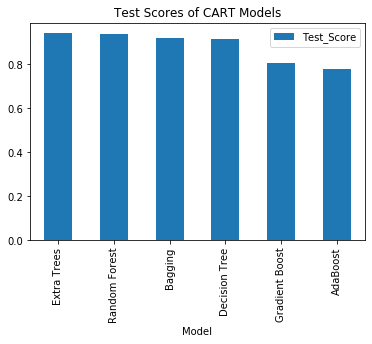

In [79]:
names = []
scores = []
for dt in dt_results:
    names.append(dt[:][0])
    scores.append(dt[:][2])
    
pd.DataFrame(list(zip(names, scores)), columns = ['Model', 'Test_Score']).set_index('Model').sort_values(by = 'Test_Score', ascending = False).plot(kind = 'bar')
plt.title('Test Scores of CART Models')

In [80]:
gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [2,3,4],
    'n_estimators': [100, 125, 150],
    'learning_rate': [.08, .1, .12]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3)
gb_gs.fit(X_train, y_train)
print(gb_gs.best_score_)
gb_gs.best_params_

0.9210657785179017


{'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 150}

In [81]:
gboost = GradientBoostingClassifier(learning_rate=0.12,max_depth=4,n_estimators=150)
gboost.fit(X_train,y_train)
print(gboost.score(X_train,y_train))
gboost.score(X_test,y_test)

0.9358034970857618


0.8504011326097216

In [82]:
extra_trees = ExtraTreesClassifier()
extra_trees_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5]
}
et_gs = GridSearchCV(extra_trees, param_grid=extra_trees_params, cv=3)
et_gs.fit(X_train,y_train)
print(et_gs.best_score_)
et_gs.best_params_

0.9900915903413822


{'max_depth': None, 'n_estimators': 150}

In [83]:
et = ExtraTreesClassifier(max_depth=None, n_estimators = 200)
et.fit(X_train,y_train)
print(et.score(X_train,y_train))
et.score(X_test,y_test)

1.0


0.9400660689004248

In [84]:
xgmodel= xgb.XGBClassifier(seed= 42)

eval_set = [(X_train, y_train), (X_test, y_test)]
scores = cross_val_score(xgb.XGBClassifier(), X_train, y_train, cv = 5, n_jobs = -1)

In [85]:
xgmodel.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.818257	validation_1-auc:0.81215
[1]	validation_0-auc:0.818257	validation_1-auc:0.81215
[2]	validation_0-auc:0.834669	validation_1-auc:0.821132
[3]	validation_0-auc:0.84113	validation_1-auc:0.824584
[4]	validation_0-auc:0.856667	validation_1-auc:0.841118
[5]	validation_0-auc:0.861148	validation_1-auc:0.840848
[6]	validation_0-auc:0.869916	validation_1-auc:0.844944
[7]	validation_0-auc:0.875286	validation_1-auc:0.848295
[8]	validation_0-auc:0.877909	validation_1-auc:0.847951
[9]	validation_0-auc:0.882517	validation_1-auc:0.848201
[10]	validation_0-auc:0.889971	validation_1-auc:0.852703
[11]	validation_0-auc:0.891861	validation_1-auc:0.854753
[12]	validation_0-auc:0.891916	validation_1-auc:0.854078
[13]	validation_0-auc:0.894195	validation_1-auc:0.854467
[14]	validation_0-auc:0.896822	validation_1-auc:0.856679
[15]	validation_0-auc:0.898807	validation_1-auc:0.857966
[16]	validation_0-auc:0.900125	validation_1-auc:0.859864
[17]	validation_0-auc:0.901401	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [86]:
xgmodel.score(X_test, y_test)

0.7975460122699386

In [89]:
preds = xgmodel.predict_proba(X_kaggle)[:,1]
to_submit = pd.DataFrame({
    'Id': test['Id'],
    'WnvPresent':preds
})
to_submit.to_csv('kaggle_answers.csv',index=False)

Text(0.5, 1.0, 'XGBoost Feature Importances')

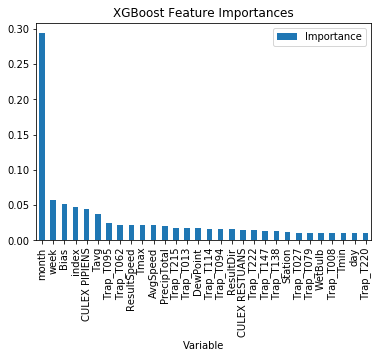

In [91]:
testnames = X_train.columns.tolist()
xg_importances = pd.DataFrame(sorted(zip(testnames, xgmodel.feature_importances_), reverse = True), columns = ['Variable', 'Importance']).set_index('Variable')
xg_importances.sort_values(by = 'Importance', ascending = False).iloc[:30,:].plot(kind = 'bar')
plt.title('XGBoost Feature Importances')

In [92]:
preds = gboost.predict_proba(X_kaggle)[:,1]
to_submit = pd.DataFrame({
    'Id': test['Id'],
    'WnvPresent':preds
})
to_submit.to_csv('kaggle_answers_gb.csv',index=False)

In [93]:
preds = et.predict_proba(X_kaggle)[:,1]
to_submit = pd.DataFrame({
    'Id': test['Id'],
    'WnvPresent':preds
})
to_submit.to_csv('kaggle_answers_et.csv',index=False)